 ## UYKU VERİMLİLİĞİ (Sleep Efficiency)

  Uyku verimliliği, uyku sırasında harcanan zamanın toplam uyku süresine oranıdır ve % olarak ifade edilir. Bu, bir kişinin uyku kalitesini ve uyku düzenini değerlendirmek için önemli bir ölçüttür. Uyku verimliliği yüksek olan bir kişi, daha az uyku süresiyle daha fazla dinlenmiş hisseder ve daha düzenli bir uyku alışkanlığına sahiptir.
  Bunun yanı sıra uyku verimliğini etkileyen birçok sebep bulunmaktadır. Bu veri analizi örneğinde uyku kalıtesi ve verimliliğine etki eden faktörlerin farklı yaş gruplarının ve cinsiyetlerin etkilenme biçimlerini inceleyeceğiz. hadi başlayalım... 


#### 1 Gerekli Kütüphaneler 
İlk aşamada gerekli küphanedeleri ekleyerek başlıyoruz burada python'a ait birçok kütüphane bulunmakta ve python' entegre olarak çalışan birçok kütüphane vardır bu kütüphanelerin nsıl kullanıldığını ufak bir araştırma ile bulabilirsiniz    

In [61]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objs as go
import plotly.express as px
plt.style.use('seaborn-dark')
plt.style.context('grayscale')
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

#### 2 Veri setini okumak

In [62]:
df=pd.read_csv("/home/sbricck/Masaüstü/verianalizi/Sleep_Efficiency.csv")

#### 3 Veri seti hakkında kısa bir bilgi edinme


Bu aşamada verimizi inceliyoruz ve gerekli duzenlemeri yapıp öyle devam etmemiz gerekli

df.head()

In [63]:
df.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [64]:
df.rename(columns = {'Wakeup time':'Wakeup_time', 'Sleep duration':'Sleep_duration ',"Sleep efficiency":"Sleep_efficiency",
                     "REM sleep percentage":"REM_sleep_percentage","Deep sleep percentage":"Deep_sleep_percentage",
                     "Light sleep percentage":"Light_sleep_percentage","Caffeine consumption":"Caffeine_consumption",
                     "Alcohol consumption":"Alcohol_consumption","Smoking status":"Smoking_status","Exercise frequency":"Exercise_frequency"}, inplace = True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup_time             452 non-null    object 
 5   Sleep_duration          452 non-null    float64
 6   Sleep_efficiency        452 non-null    float64
 7   REM_sleep_percentage    452 non-null    int64  
 8   Deep_sleep_percentage   452 non-null    int64  
 9   Light_sleep_percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine_consumption    427 non-null    float64
 12  Alcohol_consumption     438 non-null    float64
 13  Smoking_status          452 non-null    object 
 14  Exercise_frequency      446 non-null    fl

In [66]:
df.head()

,ID,Age,Gender,Bedtime,Wakeup_time,Sleep_duration,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Smoking_status,Exercise_frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


#### 4 Veri görselleştirme

In [67]:
df.Age.value_counts()

52    19
27    19
37    18
48    17
40    17
      ..
15     1
11     1
9      1
16     1
12     1
Name: Age, Length: 61, dtype: int64

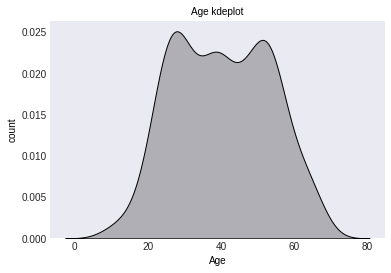

In [68]:
sns.kdeplot(data=df, x="Age",color="black",fill=True)
plt.xlabel("Age", color="black", fontsize=10)
plt.ylabel("count", color="black", fontsize=10)
plt.title("Age kdeplot", color="black",fontsize=10)
plt.show()

####  Yaşın ve cinsiyetin Uyku kalitesine etkileri

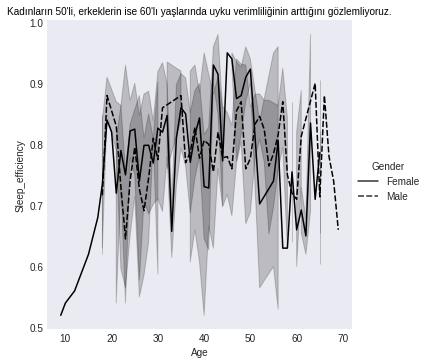

In [69]:
sns.relplot(
    data=df, kind="line",
    x="Age", y="Sleep_efficiency", style="Gender", color="black"
)
plt.title("Kadınların 50'li, erkeklerin ise 60'lı yaşlarında uyku verimliliğinin arttığını gözlemliyoruz.", color="black",fontsize=10)
plt.show()

In [70]:
df.Gender.value_counts()

Male      228
Female    224
Name: Gender, dtype: int64

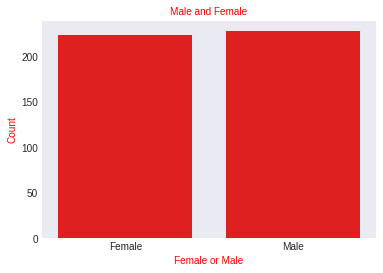

In [71]:
sns.countplot(data=df,x="Gender", color="red")
plt.xlabel("Female or Male", color="red",fontsize=10)
plt.ylabel("Count", color="red",fontsize=10)
plt.title("Male and Female", color="red",fontsize=10)
plt.show()


In [72]:
df.Smoking_status.value_counts()

No     298
Yes    154
Name: Smoking_status, dtype: int64

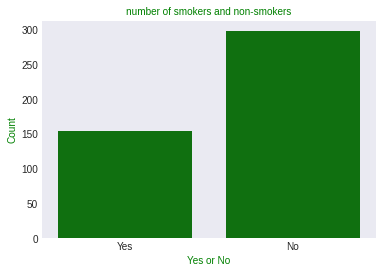

In [73]:
sns.countplot(data=df,x="Smoking_status", color="green")
plt.xlabel("Yes or No", color="green",fontsize=10)
plt.ylabel("Count", color="green",fontsize=10)
plt.title("number of smokers and non-smokers", color="green",fontsize=10)
plt.show()

#### Peki sigara uyku düzenini etkiler mi?

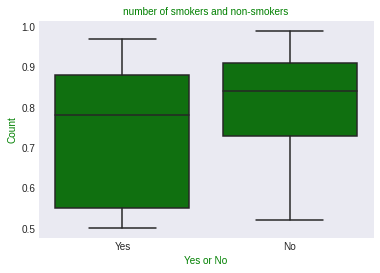

In [74]:
sns.boxplot(data=df,x="Smoking_status",y="Sleep_efficiency", color="green")
plt.xlabel("Yes or No", color="green",fontsize=10)
plt.ylabel("Count", color="green",fontsize=10)
plt.title("number of smokers and non-smokers", color="green",fontsize=10)
plt.show()

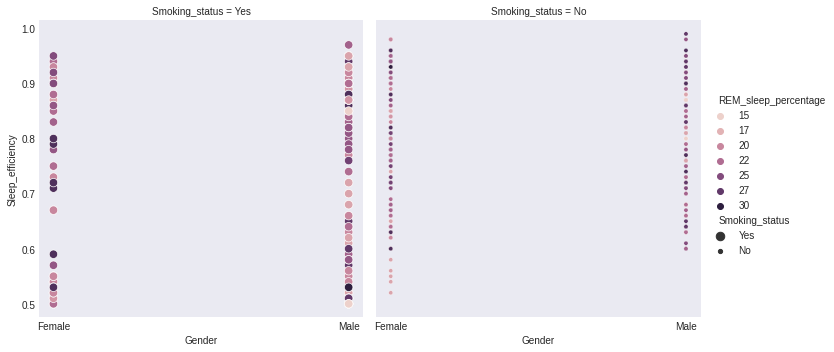

In [75]:
sns.relplot(
    data=df,
    x="Gender", y="Sleep_efficiency", col="Smoking_status",
    hue="REM_sleep_percentage", size="Smoking_status",
)
plt.show()

Yukarıda, sigara içmeyenlerin daha iyi uyku kalitesine sahip olduğunu gösteren kutu çizimi yer almaktadır

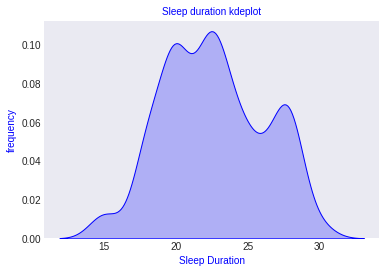

In [76]:
sns.kdeplot(data=df, x="REM_sleep_percentage",color="blue",fill=True)
plt.xlabel("Sleep Duration", color="blue", fontsize=10)
plt.ylabel("frequency", color="blue", fontsize=10)
plt.title("Sleep duration kdeplot", color="blue",fontsize=10)
plt.show()

In [77]:
df.Exercise_frequency.value_counts()

3.0    130
0.0    116
1.0     97
2.0     54
4.0     41
5.0      8
Name: Exercise_frequency, dtype: int64

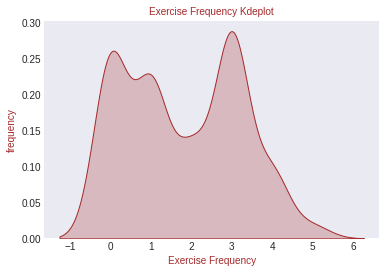

In [78]:
sns.kdeplot(data=df, x="Exercise_frequency",color="brown",fill=True)
plt.xlabel("Exercise Frequency", color="brown", fontsize=10)
plt.ylabel("frequency", color="brown", fontsize=10)
plt.title("Exercise Frequency Kdeplot", color="brown",fontsize=10)
plt.show()

In [79]:
df.Alcohol_consumption.value_counts()

0.0    246
1.0     54
3.0     48
2.0     37
5.0     30
4.0     23
Name: Alcohol_consumption, dtype: int64

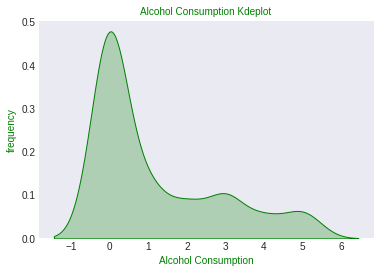

In [80]:
sns.kdeplot(data=df, x="Alcohol_consumption",color="green",fill=True)
plt.xlabel("Alcohol Consumption", color="green", fontsize=10)
plt.ylabel("frequency", color="green", fontsize=10)
plt.title("Alcohol Consumption Kdeplot", color="green",fontsize=10)
plt.show()

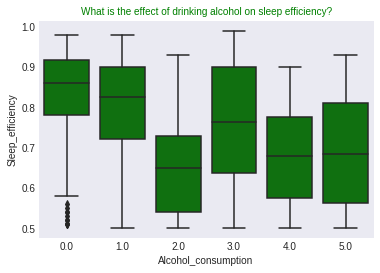

In [81]:
sns.boxplot(data=df,x="Alcohol_consumption",y="Sleep_efficiency", color="green")
plt.title("What is the effect of drinking alcohol on sleep efficiency?", color="green",fontsize=10)
plt.show()

#### Yukarıdaki sonuçlar gösteriyor ki alkol, hafıza ve öğrenme için önemli olan REM uykusuna zarar kesinlikle verir

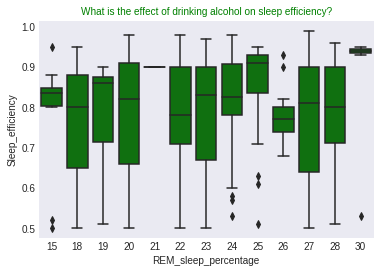

In [82]:
sns.boxplot(data=df,x="REM_sleep_percentage",y="Sleep_efficiency", color="green")
plt.title("What is the effect of drinking alcohol on sleep efficiency?", color="green",fontsize=10)
plt.show()

In [83]:
df.Caffeine_consumption.value_counts()

0.0      211
50.0     107
25.0      79
75.0      25
200.0      4
100.0      1
Name: Caffeine_consumption, dtype: int64

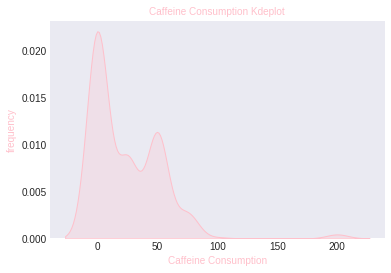

In [84]:
sns.kdeplot(data=df, x="Caffeine_consumption",color="pink",fill=True)
plt.xlabel("Caffeine Consumption", color="pink", fontsize=10)
plt.ylabel("frequency", color="pink", fontsize=10)
plt.title("Caffeine Consumption Kdeplot", color="pink",fontsize=10)
plt.show()

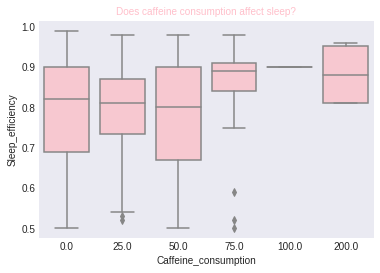

In [85]:
sns.boxplot(data=df,x="Caffeine_consumption",y="Sleep_efficiency", color="pink")
plt.title("Does caffeine consumption affect sleep?", color="pink",fontsize=10)
plt.show()

Doğruluğu hala tartışma konusu olsa dahi  yukarıdaki grafikten elde ettiğimiz sonuca göreKahve tüketimi uyku kalitesine etki etmeği yönündedir

In [86]:
df.Awakenings.value_counts()

1.0    154
0.0     95
3.0     63
4.0     63
2.0     57
Name: Awakenings, dtype: int64

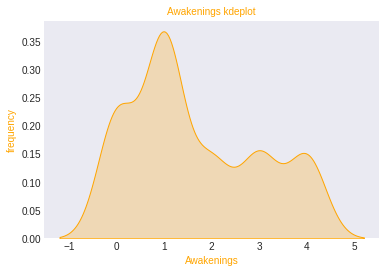

In [87]:
sns.kdeplot(data=df, x="Awakenings",color="orange",fill=True)
plt.xlabel("Awakenings", color="orange", fontsize=10)
plt.ylabel("frequency", color="orange", fontsize=10)
plt.title("Awakenings kdeplot", color="orange",fontsize=10)
plt.show()

In [88]:
df.Light_sleep_percentage.value_counts()

20    52
15    49
17    46
18    45
10    34
13    32
12    28
45    20
21    17
52    16
47    16
53    13
55    13
16    12
19    11
48    10
54     8
50     7
22     4
56     3
51     3
14     3
7      3
11     2
62     1
46     1
30     1
40     1
63     1
Name: Light_sleep_percentage, dtype: int64

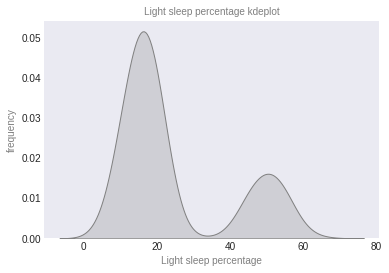

In [89]:
sns.kdeplot(data=df, x="Light_sleep_percentage",color="gray",fill=True)
plt.xlabel("Light sleep percentage", color="gray", fontsize=10)
plt.ylabel("frequency", color="gray", fontsize=10)
plt.title("Light sleep percentage kdeplot", color="gray",fontsize=10)
plt.show()

In [90]:
df.Deep_sleep_percentage.value_counts()

60    70
65    44
55    43
57    35
70    34
35    27
58    26
63    20
67    19
20    18
25    17
22    12
62     9
59     9
56     9
23     8
72     8
30     8
28     7
32     6
52     5
75     4
24     4
37     3
53     2
51     2
27     1
18     1
40     1
Name: Deep_sleep_percentage, dtype: int64

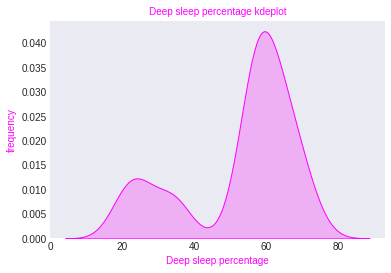

In [91]:
sns.kdeplot(data=df, x="Deep_sleep_percentage",color="magenta",fill=True)
plt.xlabel("Deep sleep percentage", color="magenta", fontsize=10)
plt.ylabel("frequency", color="magenta", fontsize=10)
plt.title("Deep sleep percentage kdeplot", color="magenta",fontsize=10)
plt.show()

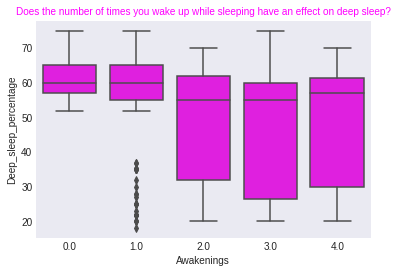

In [92]:
sns.boxplot(data=df,x="Awakenings",y="Deep_sleep_percentage", color="magenta")
plt.title("Does the number of times you wake up while sleeping have an effect on deep sleep?", color="magenta",fontsize=10)
plt.show()

In [93]:
df.REM_sleep_percentage.value_counts()

20    92
22    67
28    58
23    56
18    49
25    31
24    26
27    25
26    15
15    14
19    11
30     7
21     1
Name: REM_sleep_percentage, dtype: int64

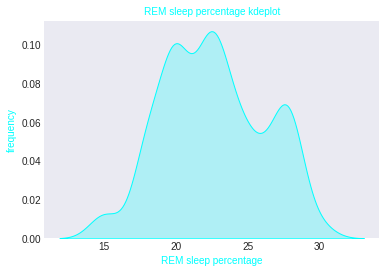

In [94]:
sns.kdeplot(data=df, x="REM_sleep_percentage",color="cyan",fill=True)
plt.xlabel("REM sleep percentage", color="cyan", fontsize=10)
plt.ylabel("frequency", color="cyan", fontsize=10)
plt.title("REM sleep percentage kdeplot", color="cyan",fontsize=10)
plt.show()

In [95]:
df.Sleep_efficiency.value_counts()

0.90    29
0.93    22
0.87    22
0.95    21
0.91    19
0.94    18
0.92    13
0.77    13
0.88    13
0.81    12
0.86    12
0.84    12
0.85    12
0.72    12
0.80    11
0.82    11
0.71    11
0.83    10
0.52     9
0.68     9
0.78     9
0.63     9
0.75     8
0.50     8
0.64     8
0.79     8
0.67     8
0.54     8
0.51     8
0.76     7
0.73     7
0.66     7
0.89     7
0.55     7
0.96     7
0.53     6
0.60     6
0.65     4
0.74     4
0.62     4
0.98     4
0.70     3
0.58     3
0.61     2
0.57     2
0.56     2
0.59     2
0.99     1
0.69     1
0.97     1
Name: Sleep_efficiency, dtype: int64

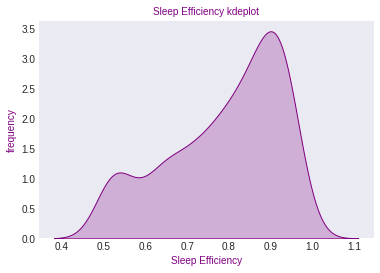

In [96]:
sns.kdeplot(data=df, x="Sleep_efficiency",color="purple",fill=True)
plt.xlabel("Sleep Efficiency", color="purple", fontsize=10)
plt.ylabel("frequency", color="purple", fontsize=10)
plt.title("Sleep Efficiency kdeplot", color="purple",fontsize=10)
plt.show()

In [97]:
df.head()

,ID,Age,Gender,Bedtime,Wakeup_time,Sleep_duration,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Smoking_status,Exercise_frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [98]:
df['Date'] = pd.to_datetime(df['Bedtime'], errors='coerce')
df['day'] = (df['Date']).dt.day
df['month'] = (df['Date']).dt.month
df['year'] = (df['Date']).dt.year
df['hour'] = (df['Date']).dt.hour

In [99]:
df['year'].value_counts()

2021    452
Name: year, dtype: int64

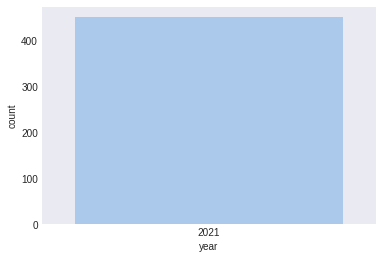

In [100]:
sns.countplot(data=df, x="year", palette="pastel")
plt.show()

In [101]:
df['hour'].value_counts()

0     110
22     83
21     73
1      67
2      64
23     55
Name: hour, dtype: int64

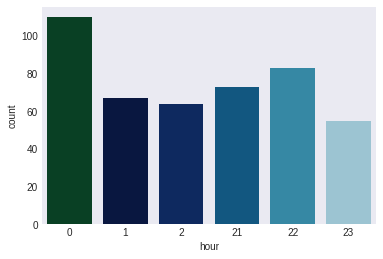

In [102]:
sns.countplot(data=df, x="hour", palette="ocean")
plt.show()

In [103]:
fig = px.pie(df, names='hour')
fig.show()

In [104]:
df['Datew'] = pd.to_datetime(df['Wakeup_time'], errors='coerce')
df['dayw'] = (df['Datew']).dt.day
df['monthw'] = (df['Datew']).dt.month
df['yearw'] = (df['Datew']).dt.year
df['hourw'] = (df['Datew']).dt.hour

In [105]:
df['hourw'].value_counts()

5     80
7     78
9     74
6     64
8     60
4     43
10    35
3     10
11     6
12     2
Name: hourw, dtype: int64

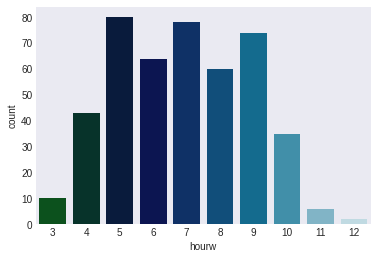

In [106]:
sns.countplot(data=df, x="hourw", palette="ocean")
plt.show()

In [107]:
fig = px.pie(df, names='hourw')
fig.show()

Bu analiz bize göşteriyor ki iyi ve kaliteli bir uyku için alkol ve sigaradan uzak durmak gerek ve cok geç saatlerde uyuma alışkanlıkları terk edilmeli ve geç saatte kalkılmamalıdır. gece saat 12 de yatılması  ve sabah 5 gibi uyanılması sizi daha verimli bir uyku ile  gune merhana demeyi sağlar.           Hepinize GÜNAYDIN